In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import pyodbc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None) # to view all the column details without truncation

In [3]:
# SWM Project connection string for SQL Server
connection_string = 'DRIVER={SQL Server};SERVER=192.168.0.100;DATABASE=MFB_LIVE;UID=sa;PWD=scs@123'
connection = pyodbc.connect(connection_string)

# SWM SQL query to select all records from the required table
query = "SELECT * FROM DP_MFB_BASE WHERE R_NO = 1"

# Execute the query and store the result in a DataFrame
df = pd.read_sql(query, connection)
df # Top 5 and bottom 5 rows and columns details

,NUM_1,UNID,UNIT_STATUS,ACTION_CODE,LATITUDE,LONGITUDE,STATION,TYCOD,SUB_TYCOD,PRIM_UNIT,ALARM_LEV,CD_TS_CLEAN_DISP,CD_TS_CLEAN,DS_TS_CLEAN,EN_TS_CLEAN,AR_TS_CLEAN,RANGE,R_NO,VEHICLE_TYPE,RESP_TIME_IN_MINS,ACKNOWLEDGE_TIME_IN_MINS,LEAVE_TIME_IN_MINS,TRAVEL_TIME_IN_MINS,INCI_COMBINED,HOUR_INCI_BIN,MNTH,YR,MNTH_NAME,MNTH_YR,DAY_OF_WEEK,CLEAN_DATE
0,F202301231,MP61,Dispatch,29,19.247632,72.862479,DAHISAR,RESCUE_SERVICE,BIRD_RESCUE,MP61,1,2023-01-20 13:55:53,2023-01-20 13:56:05,2023-01-20 13:56:05,2023-01-20 13:58:02,2023-01-20 14:03:59,REGION-4,1,MP,8.10,0.20,1.95,5.95,F202301231MP61,AFTERNOON,1,2023,January,Jan_2023,Friday,2023-01-20
1,F202301242,BK23,Dispatch,29,18.934805,72.834626,FORT,RESCUE_SERVICE,BIRD_RESCUE,BK23,1,2023-01-20 16:42:34,2023-01-20 16:42:49,2023-01-20 16:42:49,2023-01-20 16:50:01,2023-01-20 17:02:17,REGION-1,1,BK,19.72,0.25,7.20,12.27,F202301242BK23,AFTERNOON,1,2023,January,Jan_2023,Friday,2023-01-20
2,F202301364,MP39,Dispatch,29,19.230020,72.840612,BORIVALI,RESCUE_SERVICE,BIRD_RESCUE,MP39,1,2023-01-22 07:58:19,2023-01-22 08:05:11,2023-01-22 08:05:11,2023-01-22 08:05:46,2023-01-22 08:16:01,REGION-4,1,MP,17.70,6.87,0.58,10.25,F202301364MP39,MORNING,1,2023,January,Jan_2023,Sunday,2023-01-22
3,F202300310,BK11,Dispatch,29,19.261711,72.851505,KANDARPADA,FIRE_CALL,FIRE_CALL,BK11,1,2023-01-08 13:45:10,2023-01-08 13:45:26,NaT,NaT,NaT,REGION-4,1,BK,0.00,0.00,0.00,0.00,F202300310BK11,AFTERNOON,1,2023,January,Jan_2023,Sunday,2023-01-08
4,F202300321,MP36,Dispatch,29,19.197250,72.871520,DINDOSHI,RESCUE_SERVICE,BIRD_RESCUE,MP36,1,2023-01-08 16:40:36,2023-01-08 16:40:48,NaT,NaT,NaT,REGION-4,1,MP,0.00,0.00,0.00,0.00,F202300321MP36,AFTERNOON,1,2023,January,Jan_2023,Sunday,2023-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983,F202312679,MP43,Dispatch,29,19.070771,72.868015,BKC,FIRE_CALL,FIRE_CALL,MP43,1,2023-09-08 16:56:47,2023-09-08 16:57:44,2023-09-08 16:57:44,2023-09-08 17:00:23,2023-09-08 17:36:08,REGION-3,1,MP,39.35,0.95,2.65,35.75,F202312679MP43,AFTERNOON,9,2023,September,Sep_2023,Friday,2023-09-08
15984,F202312726,MP34,Dispatch,29,18.961477,72.812637,GAWALATANK,RESCUE_SERVICE,ANIMAL_RESCUE,MP34,1,2023-09-10 09:42:16,2023-09-10 09:43:39,2023-09-10 09:43:39,2023-09-10 10:20:56,2023-09-10 10:21:02,REGION-1,1,MP,38.77,1.38,37.28,0.10,F202312726MP34,MORNING,9,2023,September,Sep_2023,Sunday,2023-09-10
15985,F202312887,MP38,Dispatch,29,19.201187,72.858109,KANDIVALI,RESCUE_SERVICE,BIRD_RESCUE,MP38,1,2023-09-16 17:45:32,2023-09-16 18:35:48,2023-09-16 18:35:48,2023-09-16 18:36:28,2023-09-16 19:43:49,REGION-4,1,MP,118.28,50.27,0.67,67.35,F202312887MP38,EVENING,9,2023,September,Sep_2023,Saturday,2023-09-16
15986,F202312981,MP59,Dispatch,29,18.957974,72.832664,MEMONWADA,HOUSE_COLLAPSE,HOUSE_COLLAPSE,MP59,1,2023-09-19 12:44:34,2023-09-19 12:45:08,2023-09-19 12:45:08,2023-09-19 12:48:52,2023-09-19 13:01:37,REGION-1,1,MP,17.05,0.57,3.73,12.75,F202312981MP59,AFTERNOON,9,2023,September,Sep_2023,Tuesday,2023-09-19


In [4]:
data = df[['NUM_1', 'CLEAN_DATE']].copy()
data

,NUM_1,CLEAN_DATE
0,F202301231,2023-01-20
1,F202301242,2023-01-20
2,F202301364,2023-01-22
3,F202300310,2023-01-08
4,F202300321,2023-01-08
...,...,...
15983,F202312679,2023-09-08
15984,F202312726,2023-09-10
15985,F202312887,2023-09-16
15986,F202312981,2023-09-19


In [5]:
# Group by 'CLEAN_DATE' and count occurrences of 'NUM_1'
df_grouped = data.groupby('CLEAN_DATE', as_index=False)['NUM_1'].count()

# Rename the count column to 'NUM_1_Count'
df_grouped.rename(columns={'NUM_1': 'NUM_1_Count'}, inplace=True)

# Print or display the resulting DataFrame
df_grouped

,CLEAN_DATE,NUM_1_Count
0,2022-11-30,25
1,2022-12-01,29
2,2022-12-02,37
3,2022-12-03,42
4,2022-12-04,28
...,...,...
382,2023-12-17,27
383,2023-12-18,35
384,2023-12-19,30
385,2023-12-20,30


In [6]:
type(df_grouped)

pandas.core.frame.DataFrame

In [7]:
df_grouped.columns

Index(['CLEAN_DATE', 'NUM_1_Count'], dtype='object')

In [8]:
# converting the CLEAN_DATE column into DateTime type
df_grouped['CLEAN_DATE'] = pd.to_datetime(df['CLEAN_DATE'])

**Stationarity:**

In [9]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    result = adfuller(data) # ADF test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

check_stationarity(df_grouped['NUM_1_Count']) # p-value: 0.1688752057570228 which is greater than the alpha value 0.05

ADF Statistic: -2.3096479132137797
p-value: 0.1688752057570228
Critical Values:
1%: -3.447909006729481
5%: -2.8692783343881483
10%: -2.5708923751111112


Since the p value is greater than the alpha value we will have to reject the null hypothesis of the data being stationary and therefore will have to deal with the current non stationary data ahead.

**Outliers:**

In [10]:
# Quantile-Based Outlier Detection and Removal:

# Calculate quartiles and IQR
Q1 = df_grouped['NUM_1_Count'].quantile(0.25)
Q3 = df_grouped['NUM_1_Count'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df_grouped[(df_grouped['NUM_1_Count'] < (Q1 - 1.5 * IQR)) | (df_grouped['NUM_1_Count'] > (Q3 + 1.5 * IQR))]

# Remove outliers
cleaned_iqr_df = df_grouped[~df_grouped.index.isin(outliers.index)]
cleaned_iqr_df

,CLEAN_DATE,NUM_1_Count
0,2023-01-20,25
1,2023-01-20,29
2,2023-01-22,37
3,2023-01-08,42
4,2023-01-08,28
...,...,...
382,2023-01-16,27
383,2023-01-16,35
384,2023-01-06,30
385,2023-01-07,30


In [11]:
# Z-Score-Based Outlier Detection and Removal:
from scipy import stats

# Calculate z-scores
df['z_score'] = stats.zscore(df_grouped['NUM_1_Count'])

# Identify outliers based on z-score threshold (e.g., 3)
outliers = df[df['z_score'].abs() > 3]

# Remove outliers
cleaned_zscore_df = df_grouped[~df_grouped.index.isin(outliers.index)]
cleaned_zscore_df

,CLEAN_DATE,NUM_1_Count
0,2023-01-20,25
1,2023-01-20,29
2,2023-01-22,37
3,2023-01-08,42
4,2023-01-08,28
...,...,...
382,2023-01-16,27
383,2023-01-16,35
384,2023-01-06,30
385,2023-01-07,30


For a normal distribution, a z-score threshold of 3 corresponds to approximately the 99.7th percentile, meaning it captures outliers that are extremely rare in a normally distributed dataset.

**Log transformation:**

In [12]:
# Taking logarithm to stabilize variance
cleaned_zscore_df['Log_incident_count'] = cleaned_zscore_df['NUM_1_Count'].apply(lambda x: np.log(x + 1))  # Adding 1 to handle zero values

# Taking difference to remove trends (e.g., first-order difference)
cleaned_zscore_df['Diff_incident_count'] = cleaned_zscore_df['NUM_1_Count'].diff()
cleaned_zscore_df

,CLEAN_DATE,NUM_1_Count,Log_incident_count,Diff_incident_count
0,2023-01-20,25,3.258097,NaN
1,2023-01-20,29,3.401197,4.0
2,2023-01-22,37,3.637586,8.0
3,2023-01-08,42,3.761200,5.0
4,2023-01-08,28,3.367296,-14.0
...,...,...,...,...
382,2023-01-16,27,3.332205,-6.0
383,2023-01-16,35,3.583519,8.0
384,2023-01-06,30,3.433987,-5.0
385,2023-01-07,30,3.433987,0.0


**Inverse transformation:**

In [13]:
# Taking the exponential to get back the original values from the log transformation
cleaned_zscore_df['Reversed_log_incident_count'] = np.exp(cleaned_zscore_df['Log_incident_count']) - 1  # Subtract 1 since we added 1 during the log transformation
cleaned_zscore_df

,CLEAN_DATE,NUM_1_Count,Log_incident_count,Diff_incident_count,Reversed_log_incident_count
0,2023-01-20,25,3.258097,NaN,25.0
1,2023-01-20,29,3.401197,4.0,29.0
2,2023-01-22,37,3.637586,8.0,37.0
3,2023-01-08,42,3.761200,5.0,42.0
4,2023-01-08,28,3.367296,-14.0,28.0
...,...,...,...,...,...
382,2023-01-16,27,3.332205,-6.0,27.0
383,2023-01-16,35,3.583519,8.0,35.0
384,2023-01-06,30,3.433987,-5.0,30.0
385,2023-01-07,30,3.433987,0.0,30.0


In [14]:
cleaned_zscore_df.Diff_incident_count.isna().sum() # checking for missing values

1

In [15]:
cleaned_zscore_df['Diff_incident_count'].fillna(0, inplace=True) # imputing the missing value with 0
cleaned_zscore_df['Diff_incident_count'].isna().sum()

0

In [16]:
cleaned_zscore_df

,CLEAN_DATE,NUM_1_Count,Log_incident_count,Diff_incident_count,Reversed_log_incident_count
0,2023-01-20,25,3.258097,0.0,25.0
1,2023-01-20,29,3.401197,4.0,29.0
2,2023-01-22,37,3.637586,8.0,37.0
3,2023-01-08,42,3.761200,5.0,42.0
4,2023-01-08,28,3.367296,-14.0,28.0
...,...,...,...,...,...
382,2023-01-16,27,3.332205,-6.0,27.0
383,2023-01-16,35,3.583519,8.0,35.0
384,2023-01-06,30,3.433987,-5.0,30.0
385,2023-01-07,30,3.433987,0.0,30.0


**Plots:**
- Autocorrelation function (ACF)
- Partial autocorrelation function (PACF)
- Akaike Information Criterion (AIC)
- Bayesian Information Criterion (BIC)

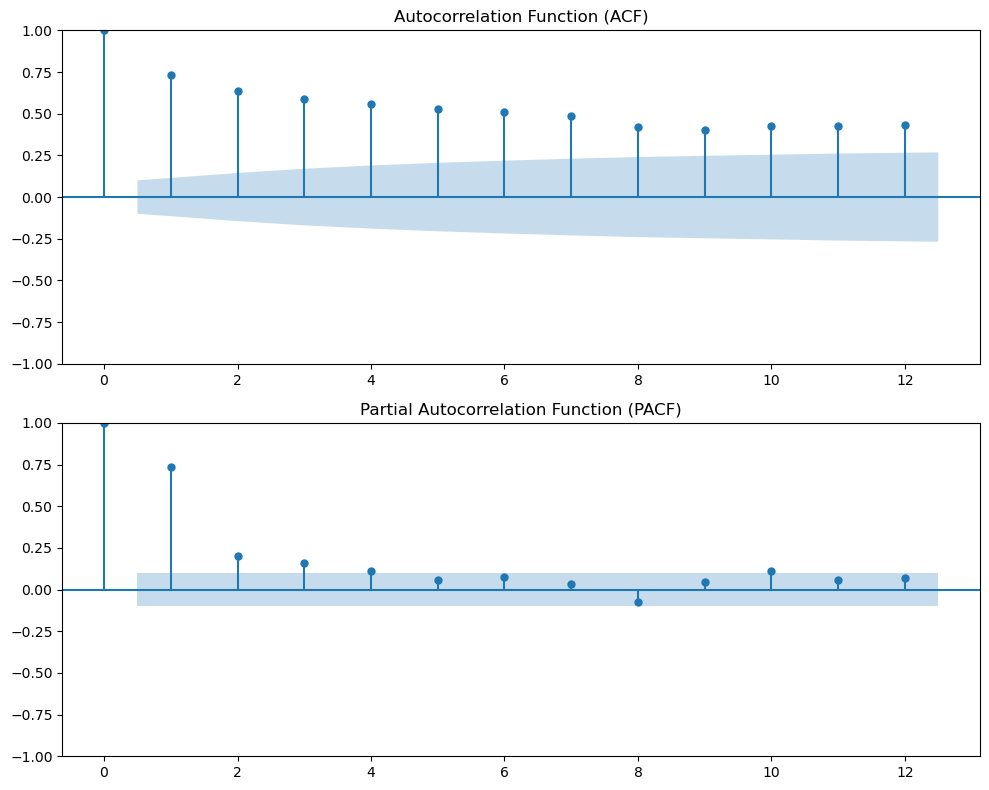

C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

Best AIC: 2875.4045560639406
Best BIC: 2887.2408178897604
Best Parameters: (1, 1, 1)


In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(cleaned_zscore_df['NUM_1_Count'], ax=ax1, lags=12) # lag for 12 month data
ax1.set_title('Autocorrelation Function (ACF)')

plot_pacf(cleaned_zscore_df['NUM_1_Count'], ax=ax2, lags=12) # lag for 12 month data
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Use AIC and BIC to select model parameters
# Assuming ARIMA model with (p, d, q) parameters to be tuned

p_values = range(0, 3)  # Example range for AR parameter
d_values = range(0, 2)  # Example range for differencing parameter (d)
q_values = range(0, 3)  # Example range for MA parameter

best_aic = np.inf
best_bic = np.inf
best_params = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(cleaned_zscore_df['NUM_1_Count'], order=(p, d, q))
                results = model.fit()

                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = (p, d, q)

                if results.bic < best_bic:
                    best_bic = results.bic

            except:
                continue

print(f'Best AIC: {best_aic}')
print(f'Best BIC: {best_bic}')
print(f'Best Parameters: {best_params}')

**Splitting the Feature and Column details and then generating training and testing data**

In [18]:
from sklearn.model_selection import train_test_split

X = cleaned_zscore_df['CLEAN_DATE']  # Feature
y = cleaned_zscore_df['NUM_1_Count']  # Target label

# Split the data into training and testing sets (e.g., 75% train and 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the train and test sets
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (287,) (287,)
Test set: (96,) (96,)


In [19]:
from sklearn.model_selection import train_test_split

X = cleaned_zscore_df['CLEAN_DATE']  # Feature
y = cleaned_zscore_df['Log_incident_count']  # Target label

# Split the data into training and testing sets (e.g., 75% train and 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the train and test sets
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (287,) (287,)
Test set: (96,) (96,)


**ARIMA Model Creation:**

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Using the above generated best param values here
p = 1  # AR parameter
d = 1  # Differencing parameter
q = 1  # MA parameter

# Fit ARIMA model using training data
model = ARIMA(y_train, order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:     Log_incident_count   No. Observations:                  287
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -148.053
Date:                Fri, 15 Mar 2024   AIC                            302.107
Time:                        15:47:24   BIC                            313.075
Sample:                             0   HQIC                           306.503
                                - 287                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0516      0.064      0.803      0.422      -0.074       0.177
ma.L1         -1.0000     13.128     -0.076      0.939     -26.731      24.731
sigma2         0.1617      2.125      0.076      0.9

C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
# Make predictions on training data
y_train_pred = results.predict(dynamic=False)
print("Prediction on Log Training Data:", y_train_pred)

# Calculate and print Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) on training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print('\nEvaluation Metrics:')
print(f'Mean Absolute Error (MAE) on training data: {mae_train}')
print(f'Mean Squared Error (MSE) on training data: {mse_train}')
print(f'Root Mean Squared Error (RMSE) on training data: {rmse_train}')

# Mean Absolute Percentage Error
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
print(f'Mean Absolute Percentage Error (MAPE) on training data: {mape_train}')

Prediction on Log Training Data: 133    0.000000
343    3.871200
337    3.734347
103    3.562953
175    3.600691
         ...   
73     3.668999
108    3.675901
274    3.655541
352    3.640343
104    3.639622
Name: predicted_mean, Length: 287, dtype: float64

Evaluation Metrics:
Mean Absolute Error (MAE) on training data: 0.33367683896395833
Mean Squared Error (MSE) on training data: 0.21597386970457333
Root Mean Squared Error (RMSE) on training data: 0.4647298889726949
Mean Absolute Percentage Error (MAPE) on training data: 0.09486370709330215


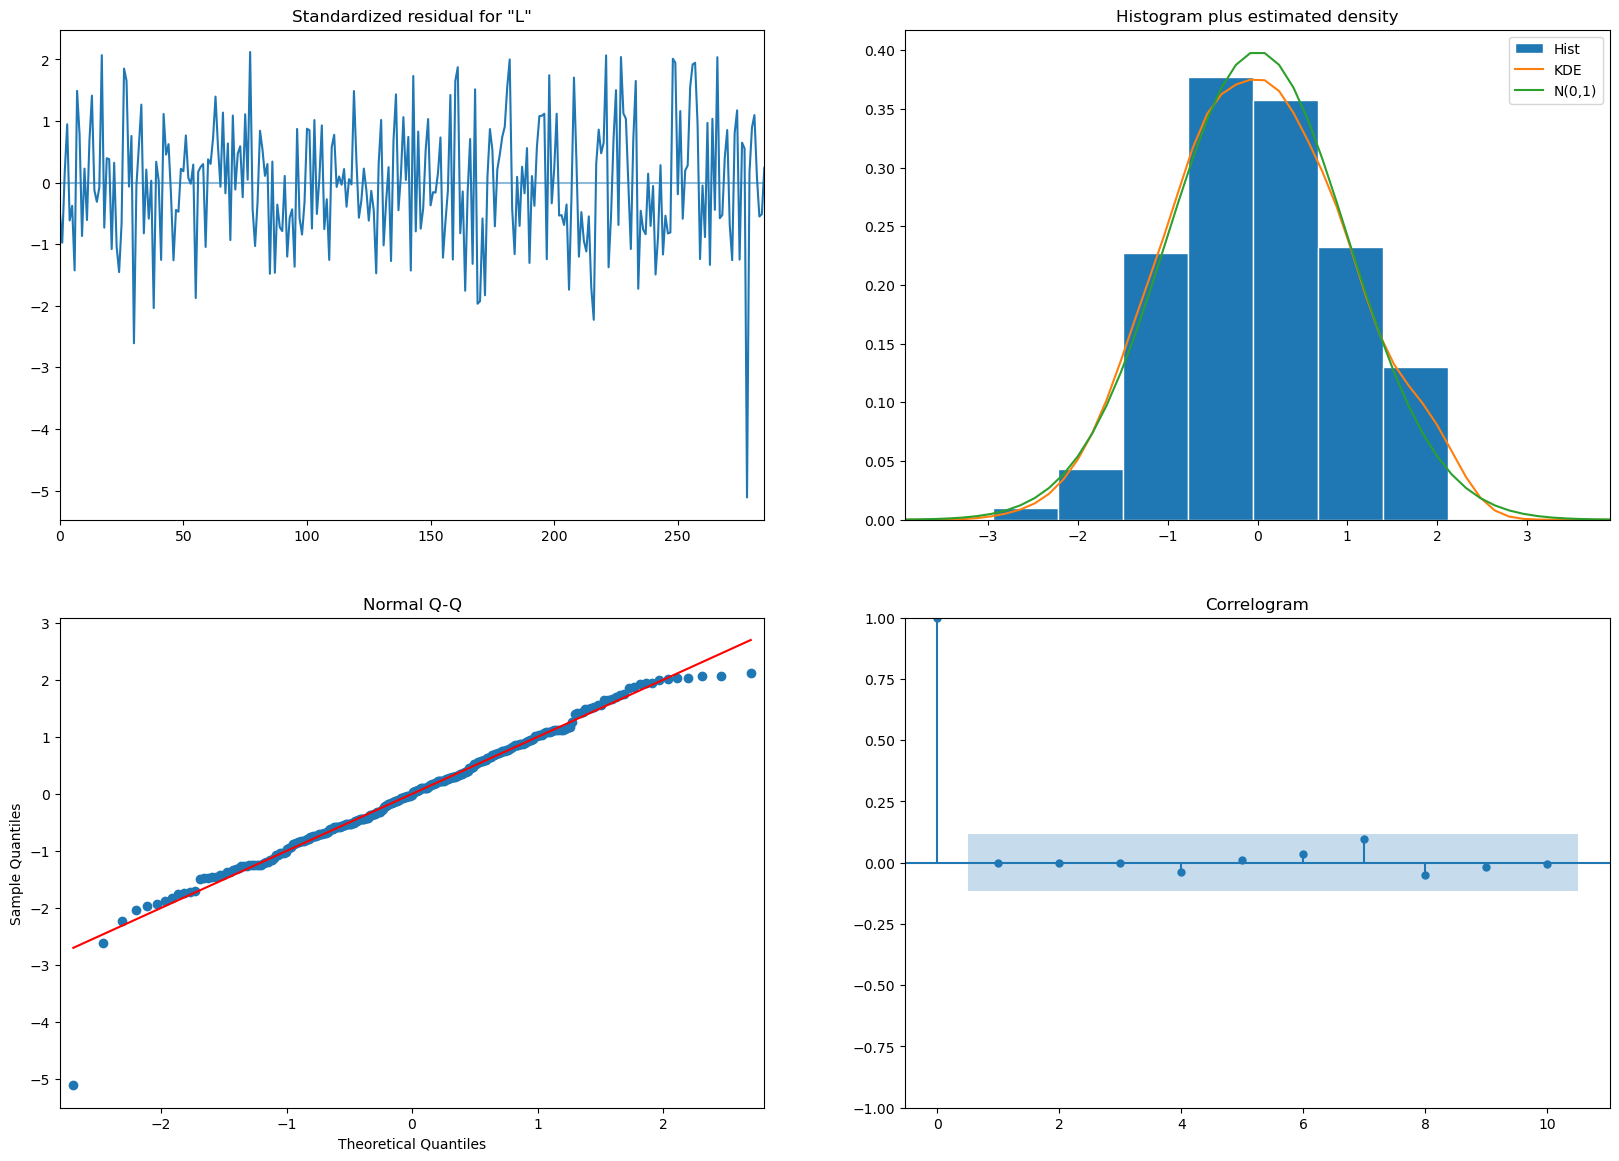

In [30]:
results.plot_diagnostics(figsize=(20,14))
plt.show()

In [22]:
# Forecast future values
forecast_steps = 10  # Number of steps to forecast
forecast = results.forecast(steps=forecast_steps)

# Print forecasted values
print(forecast)

287    3.655627
288    3.651395
289    3.651177
290    3.651166
291    3.651165
292    3.651165
293    3.651165
294    3.651165
295    3.651165
296    3.651165
Name: predicted_mean, dtype: float64


C:\Users\adity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


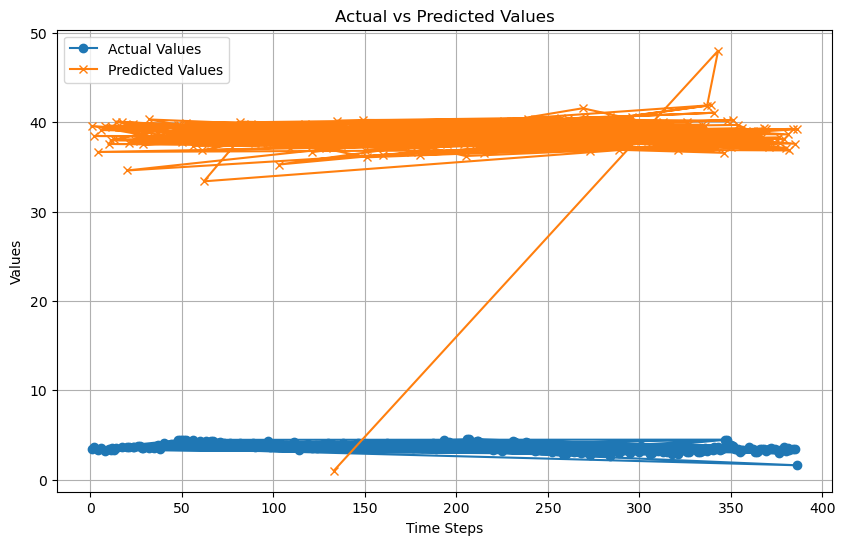

In [23]:
# Assuming actual_values and predicted_values contain the actual and predicted values respectively
actual_values = y_train
log_preds = y_train_pred

# Apply inverse transformation to get the original scale predictions
predicted_values = np.exp(y_train_pred)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', marker='o')
plt.plot(predicted_values, label='Predicted Values', marker='x')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
y_train

133    3.871201
343    3.610918
337    3.258097
103    3.637586
175    4.025352
         ...   
73     4.110874
108    3.713572
274    3.433987
352    3.433987
104    3.737670
Name: Log_incident_count, Length: 287, dtype: float64

In [28]:
y_train_pred

133    0.000000
343    3.871200
337    3.734347
103    3.562953
175    3.600691
         ...   
73     3.668999
108    3.675901
274    3.655541
352    3.640343
104    3.639622
Name: predicted_mean, Length: 287, dtype: float64

In [24]:
predicted_values

133     1.000000
343    47.999973
337    41.860665
103    35.267178
175    36.623526
         ...    
73     39.212648
108    39.484203
274    38.688441
352    38.104908
104    38.077435
Name: predicted_mean, Length: 287, dtype: float64